In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('TCGA-BRCA.htseq_fpkm.tsv',sep='\t')

In [3]:
dff = df.reset_index(drop=True)
dff

,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
1,ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
2,ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60478,ENSG00000105063.17,3.680055,3.969785,3.011921,4.059347,4.249147,3.935869,4.082827,3.931459,3.870035,...,3.348868,3.650676,4.478325,3.520017,3.372176,3.772585,3.133380,4.186347,3.340223,3.966532
60479,ENSG00000231119.2,0.285640,0.115149,0.384451,0.345883,0.065679,0.837305,0.198863,0.216728,0.102007,...,0.329875,0.232873,0.069587,0.117933,0.343273,0.149851,0.270187,0.484561,0.127070,0.174248
60480,ENSG00000280861.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60481,ENSG00000123685.7,0.599579,1.382192,0.629043,0.396315,0.157504,0.662529,0.174878,1.724989,0.580636,...,0.487383,0.491877,1.261285,0.407713,0.379536,0.551165,0.611319,0.706170,0.683710,0.430933


In [4]:
df_T= dff.set_index(
    'Ensembl_ID').T.reset_index().rename_axis(None,axis=1).rename(columns= {"index":"Ensembl_ID"})

In [5]:
new_df = df_T.loc[:, (df_T!=0).any(axis=0)]

In [6]:
gene=new_df.drop(columns='Ensembl_ID')

In [7]:
gene

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.098232,0.073008,0.0,0.000000,0.000000,3.680055,0.285640,0.0,0.599579,0.0
1,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.000000,...,0.011167,0.000000,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
2,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,0.461624,...,0.322213,0.039503,0.0,0.092108,0.000000,3.011921,0.384451,0.0,0.629043,0.0
3,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,0.088912,...,0.016356,0.118749,0.0,0.000000,0.000000,4.059347,0.345883,0.0,0.396315,0.0
4,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,0.066036,...,0.034593,0.000000,0.0,0.113546,0.000000,4.249147,0.065679,0.0,0.157504,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.000000,0.000000,2.861514,0.0,2.120565,2.992269,0.0,0.037693,7.673599,0.535481,...,0.021983,0.066625,0.0,0.153477,0.000000,3.772585,0.149851,0.0,0.551165,0.0
1213,0.471630,0.000000,1.626213,0.0,1.605675,3.224406,0.0,0.039177,7.439460,0.775822,...,0.401469,0.017897,0.0,0.180659,0.127060,3.133380,0.270187,0.0,0.611319,0.0
1214,0.083825,0.000000,1.692995,0.0,2.055448,3.476192,0.0,0.033737,7.138577,0.220669,...,0.334910,0.000000,0.0,0.132664,0.000000,4.186347,0.484561,0.0,0.706170,0.0
1215,0.000000,0.005858,2.051916,0.0,2.195782,3.369091,0.0,0.031773,7.446467,0.249784,...,0.199790,0.101503,0.0,0.130170,0.000000,3.340223,0.127070,0.0,0.683710,0.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(gene)
gene_scaled=scaler.transform(gene)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca_95=PCA(n_components=.95,random_state=1234)
pca_95.fit(gene_scaled)
X_pca_95=pca_95.transform(gene_scaled)

In [12]:
X_pca_95

array([[-2.45315313e+01,  1.13428486e+01, -3.12848995e+01, ...,
         5.38398099e+00,  7.60183394e+00, -1.14584668e-01],
       [-1.85242490e+01,  3.41467280e+01, -1.82999108e+01, ...,
         1.07607832e+00, -2.47203118e-01, -7.52894664e-01],
       [ 4.89899768e+01, -3.78320879e+01,  1.10355854e+02, ...,
         1.00847819e+00,  2.65622587e-01,  2.77148136e-01],
       ...,
       [-5.77488549e+00, -2.31285951e+01,  5.62924846e+01, ...,
         1.03733633e+00, -1.71686026e+00,  3.48642712e-01],
       [-1.70675712e+01,  5.27161409e+00,  1.21883737e+01, ...,
         2.42740498e+00, -7.35898427e+00,  4.28154650e+00],
       [-1.04466968e+00,  2.67290313e+00,  3.42071346e-02, ...,
        -2.94052163e+00, -6.60527355e-01,  1.18484884e+00]])

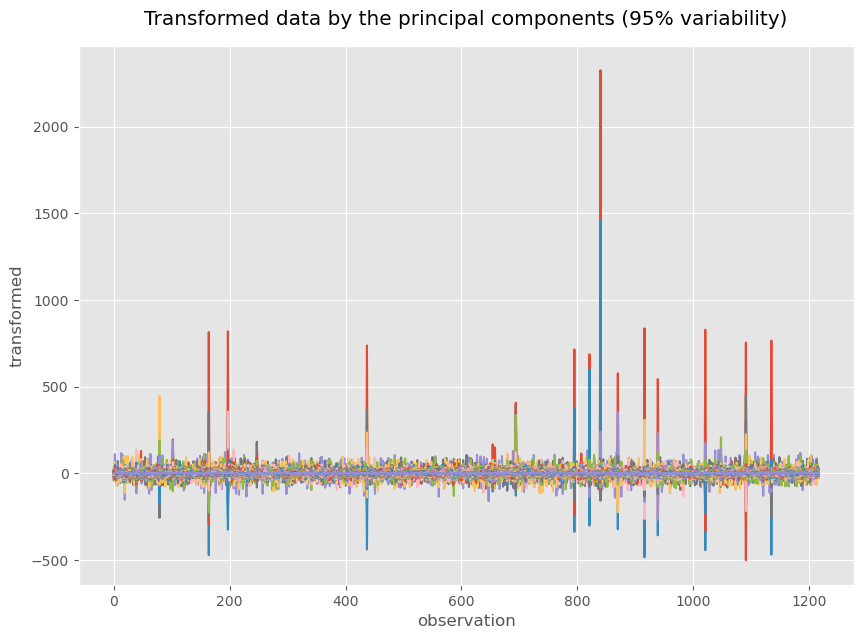

In [13]:
plt.figure(figsize=(10,7))
plt.plot(X_pca_95)
plt.xlabel('observation')
plt.ylabel('transformed')
plt.title('Transformed data by the principal components (95% variability)',pad=15)
plt.savefig('plot.png')

In [14]:
new_pd=pd.DataFrame(X_pca_95)

In [15]:
new_pd.shape

(1217, 878)

In [16]:
extracted_col = df_T["Ensembl_ID"]
print("column to added from first dataframe to second:")
display(extracted_col)
  

column to added from first dataframe to second:


0       TCGA-E9-A1NI-01A
1       TCGA-A1-A0SP-01A
2       TCGA-BH-A1EU-11A
3       TCGA-A8-A06X-01A
4       TCGA-E2-A14T-01A
              ...       
1212    TCGA-EW-A1P3-01A
1213    TCGA-A7-A13F-11A
1214    TCGA-A2-A0T6-01A
1215    TCGA-A7-A5ZW-01A
1216    TCGA-BH-A203-01A
Name: Ensembl_ID, Length: 1217, dtype: object

In [17]:
new_pd.insert(0, "Ensembl_ID", extracted_col)

In [18]:
new_pd

,Ensembl_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [19]:
new_pd_gene=new_pd.rename(columns={'Ensembl_ID':'sample_ID'})
new_pd_gene

,sample_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [20]:
new_pd_gene

,sample_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [21]:
rna=pd.read_csv('TCGA-BRCA.mirna.tsv',sep='\t')
rna

,miRNA_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-LL-A5YP-01A,TCGA-E2-A14T-01A,TCGA-AR-A24O-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-E9-A24A-01A,TCGA-E9-A1RB-01A,...,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-A2-A0SV-01A,TCGA-BH-A0BO-01A,TCGA-B6-A0RN-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,hsa-let-7a-1,12.686183,12.891305,12.887718,14.108360,13.461873,12.265034,12.998680,13.383760,12.845777,...,12.978411,14.018583,12.404741,13.441146,13.168463,12.648896,14.119837,12.751446,13.497555,13.377192
1,hsa-let-7a-2,12.662222,12.869347,12.879000,14.118814,13.476615,12.241975,13.005067,13.380326,12.844904,...,12.960026,14.003807,12.380744,13.449313,13.154539,12.662858,14.135787,12.752993,13.505774,13.359864
2,hsa-let-7a-3,12.702090,12.888348,12.900761,14.155944,13.488667,12.290275,12.997857,13.388873,12.853264,...,12.967357,14.035824,12.439656,13.443056,13.196045,12.676500,14.147772,12.762161,13.497234,13.375518
3,hsa-let-7b,13.954108,15.019690,13.485065,13.811893,15.261777,13.809151,13.627295,14.974551,14.759085,...,14.674505,14.873317,14.013927,15.261052,16.636407,14.392788,14.788002,14.928173,14.451789,14.947434
4,hsa-let-7c,10.343736,10.822866,10.325324,11.047247,12.039291,9.057759,11.581334,10.195591,9.996306,...,11.401806,13.281604,9.512755,12.257532,11.504708,10.826527,13.046762,11.080933,12.224227,10.234638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,hsa-mir-9500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1877,hsa-mir-96,5.486710,5.365221,4.935182,5.246102,4.682331,5.539974,2.952988,4.192225,3.703261,...,6.000770,3.365852,3.899755,4.825829,5.970415,5.630192,1.504278,3.069699,4.148438,3.420965
1878,hsa-mir-98,5.943471,6.053592,6.782349,4.794847,5.562759,6.602330,5.489263,6.138740,6.054672,...,5.144954,5.184865,5.697202,5.400939,4.763354,5.390010,5.901553,5.274988,5.420709,5.022092
1879,hsa-mir-99a,8.977608,9.241627,8.264888,9.254036,10.691980,7.303956,9.875042,8.418708,8.616531,...,10.545658,11.636532,7.668619,10.337282,9.666720,9.517134,11.459398,9.178330,9.467839,9.313761


In [22]:
rna1 = rna.reset_index(drop=True)
rna1

,miRNA_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-LL-A5YP-01A,TCGA-E2-A14T-01A,TCGA-AR-A24O-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-E9-A24A-01A,TCGA-E9-A1RB-01A,...,TCGA-E2-A1L6-01A,TCGA-BH-A0DT-11A,TCGA-A2-A0SV-01A,TCGA-BH-A0BO-01A,TCGA-B6-A0RN-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,hsa-let-7a-1,12.686183,12.891305,12.887718,14.108360,13.461873,12.265034,12.998680,13.383760,12.845777,...,12.978411,14.018583,12.404741,13.441146,13.168463,12.648896,14.119837,12.751446,13.497555,13.377192
1,hsa-let-7a-2,12.662222,12.869347,12.879000,14.118814,13.476615,12.241975,13.005067,13.380326,12.844904,...,12.960026,14.003807,12.380744,13.449313,13.154539,12.662858,14.135787,12.752993,13.505774,13.359864
2,hsa-let-7a-3,12.702090,12.888348,12.900761,14.155944,13.488667,12.290275,12.997857,13.388873,12.853264,...,12.967357,14.035824,12.439656,13.443056,13.196045,12.676500,14.147772,12.762161,13.497234,13.375518
3,hsa-let-7b,13.954108,15.019690,13.485065,13.811893,15.261777,13.809151,13.627295,14.974551,14.759085,...,14.674505,14.873317,14.013927,15.261052,16.636407,14.392788,14.788002,14.928173,14.451789,14.947434
4,hsa-let-7c,10.343736,10.822866,10.325324,11.047247,12.039291,9.057759,11.581334,10.195591,9.996306,...,11.401806,13.281604,9.512755,12.257532,11.504708,10.826527,13.046762,11.080933,12.224227,10.234638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,hsa-mir-9500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1877,hsa-mir-96,5.486710,5.365221,4.935182,5.246102,4.682331,5.539974,2.952988,4.192225,3.703261,...,6.000770,3.365852,3.899755,4.825829,5.970415,5.630192,1.504278,3.069699,4.148438,3.420965
1878,hsa-mir-98,5.943471,6.053592,6.782349,4.794847,5.562759,6.602330,5.489263,6.138740,6.054672,...,5.144954,5.184865,5.697202,5.400939,4.763354,5.390010,5.901553,5.274988,5.420709,5.022092
1879,hsa-mir-99a,8.977608,9.241627,8.264888,9.254036,10.691980,7.303956,9.875042,8.418708,8.616531,...,10.545658,11.636532,7.668619,10.337282,9.666720,9.517134,11.459398,9.178330,9.467839,9.313761


In [23]:
rna2= rna1.set_index(
    'miRNA_ID').T.reset_index().rename_axis(None,axis=1).rename(columns= {"index":"miRNA_ID"})

In [24]:
rna2

,miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,TCGA-E9-A1NI-01A,12.686183,12.662222,12.702090,13.954108,10.343736,9.295373,9.635422,10.590267,10.619278,...,0.0,0.000000,0.0,0.000000,1.626492,0.0,5.486710,5.943471,8.977608,16.204958
1,TCGA-A1-A0SP-01A,12.891305,12.869347,12.888348,15.019690,10.822866,9.947921,9.849888,10.752409,10.725704,...,0.0,3.338596,0.0,0.000000,4.381362,0.0,5.365221,6.053592,9.241627,14.983204
2,TCGA-LL-A5YP-01A,12.887718,12.879000,12.900761,13.485065,10.325324,9.747751,11.101686,11.889678,11.923924,...,0.0,2.718220,0.0,0.225409,1.428192,0.0,4.935182,6.782349,8.264888,15.917452
3,TCGA-E2-A14T-01A,14.108360,14.118814,14.155944,13.811893,11.047247,7.606842,9.403753,11.586679,11.607801,...,0.0,2.269815,0.0,1.013901,1.013901,0.0,5.246102,4.794847,9.254036,15.303411
4,TCGA-AR-A24O-01A,13.461873,13.476615,13.488667,15.261777,12.039291,8.730956,9.516602,11.293465,11.286356,...,0.0,1.865453,0.0,0.526707,1.466000,0.0,4.682331,5.562759,10.691980,15.412182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,TCGA-EW-A1P3-01A,12.648896,12.662858,12.676500,14.392788,10.826527,8.159075,9.269368,10.836216,10.825520,...,0.0,1.983283,0.0,1.180126,1.983283,0.0,5.630192,5.390010,9.517134,15.013499
1198,TCGA-A7-A13F-11A,14.119837,14.135787,14.147772,14.788002,13.046762,9.704698,10.922352,12.737058,12.744028,...,0.0,2.801093,0.0,2.075343,2.359762,0.0,1.504278,5.901553,11.459398,15.169036
1199,TCGA-A2-A0T6-01A,12.751446,12.752993,12.762161,14.928173,11.080933,8.058076,10.086268,10.978627,11.026217,...,0.0,1.076831,0.0,0.000000,1.076831,0.0,3.069699,5.274988,9.178330,14.405117
1200,TCGA-A7-A5ZW-01A,13.497555,13.505774,13.497234,14.451789,12.224227,7.395225,9.532374,11.736371,11.757979,...,0.0,1.051502,0.0,1.748422,1.193597,0.0,4.148438,5.420709,9.467839,13.415149


In [25]:
new_df1 = rna2.loc[:, (rna2!=0).any(axis=0)]

In [26]:
new_df1

,miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,TCGA-E9-A1NI-01A,12.686183,12.662222,12.702090,13.954108,10.343736,9.295373,9.635422,10.590267,10.619278,...,4.145751,0.0,0.000000,0.0,0.000000,1.626492,5.486710,5.943471,8.977608,16.204958
1,TCGA-A1-A0SP-01A,12.891305,12.869347,12.888348,15.019690,10.822866,9.947921,9.849888,10.752409,10.725704,...,3.260019,0.0,3.338596,0.0,0.000000,4.381362,5.365221,6.053592,9.241627,14.983204
2,TCGA-LL-A5YP-01A,12.887718,12.879000,12.900761,13.485065,10.325324,9.747751,11.101686,11.889678,11.923924,...,2.642097,0.0,2.718220,0.0,0.225409,1.428192,4.935182,6.782349,8.264888,15.917452
3,TCGA-E2-A14T-01A,14.108360,14.118814,14.155944,13.811893,11.047247,7.606842,9.403753,11.586679,11.607801,...,3.382545,0.0,2.269815,0.0,1.013901,1.013901,5.246102,4.794847,9.254036,15.303411
4,TCGA-AR-A24O-01A,13.461873,13.476615,13.488667,15.261777,12.039291,8.730956,9.516602,11.293465,11.286356,...,0.911711,0.0,1.865453,0.0,0.526707,1.466000,4.682331,5.562759,10.691980,15.412182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,TCGA-EW-A1P3-01A,12.648896,12.662858,12.676500,14.392788,10.826527,8.159075,9.269368,10.836216,10.825520,...,2.384018,0.0,1.983283,0.0,1.180126,1.983283,5.630192,5.390010,9.517134,15.013499
1198,TCGA-A7-A13F-11A,14.119837,14.135787,14.147772,14.788002,13.046762,9.704698,10.922352,12.737058,12.744028,...,1.504278,0.0,2.801093,0.0,2.075343,2.359762,1.504278,5.901553,11.459398,15.169036
1199,TCGA-A2-A0T6-01A,12.751446,12.752993,12.762161,14.928173,11.080933,8.058076,10.086268,10.978627,11.026217,...,0.798754,0.0,1.076831,0.0,0.000000,1.076831,3.069699,5.274988,9.178330,14.405117
1200,TCGA-A7-A5ZW-01A,13.497555,13.505774,13.497234,14.451789,12.224227,7.395225,9.532374,11.736371,11.757979,...,0.280406,0.0,1.051502,0.0,1.748422,1.193597,4.148438,5.420709,9.467839,13.415149


In [27]:
rna3=new_df1.drop(columns='miRNA_ID')

In [28]:
rna3.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,12.686183,12.662222,12.702090,13.954108,10.343736,9.295373,9.635422,10.590267,10.619278,9.196173,...,4.145751,0.0,0.000000,0.0,0.000000,1.626492,5.486710,5.943471,8.977608,16.204958
1,12.891305,12.869347,12.888348,15.019690,10.822866,9.947921,9.849888,10.752409,10.725704,9.326014,...,3.260019,0.0,3.338596,0.0,0.000000,4.381362,5.365221,6.053592,9.241627,14.983204
2,12.887718,12.879000,12.900761,13.485065,10.325324,9.747751,11.101686,11.889678,11.923924,8.743178,...,2.642097,0.0,2.718220,0.0,0.225409,1.428192,4.935182,6.782349,8.264888,15.917452
3,14.108360,14.118814,14.155944,13.811893,11.047247,7.606842,9.403753,11.586679,11.607801,8.834157,...,3.382545,0.0,2.269815,0.0,1.013901,1.013901,5.246102,4.794847,9.254036,15.303411
4,13.461873,13.476615,13.488667,15.261777,12.039291,8.730956,9.516602,11.293465,11.286356,8.520303,...,0.911711,0.0,1.865453,0.0,0.526707,1.466000,4.682331,5.562759,10.691980,15.412182


In [29]:
A=rna3.values
A.shape

(1202, 1604)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(A)
A_scaled=scaler.transform(A)

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca_95=PCA(n_components=.95,random_state=1234)
pca_95.fit(A_scaled)
A_pca_95=pca_95.transform(A_scaled)

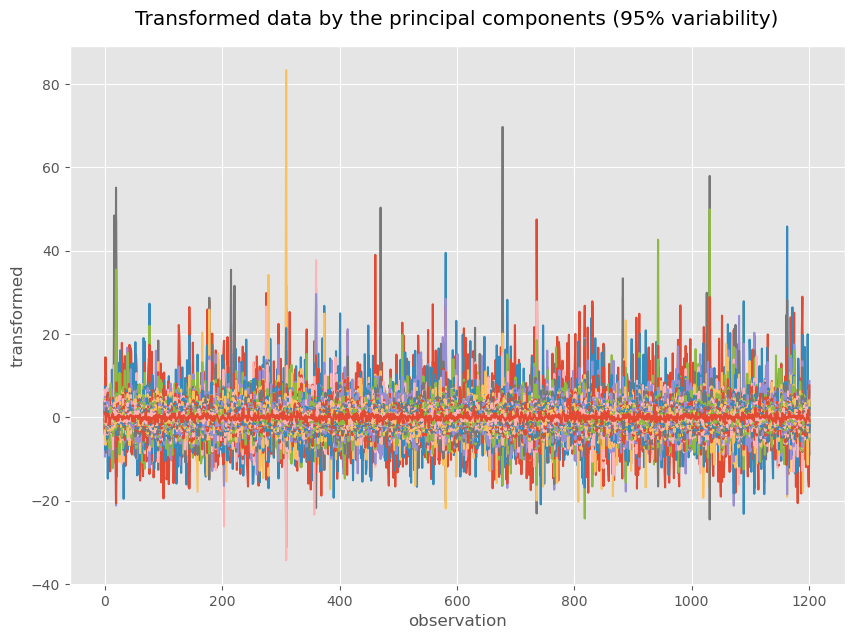

In [33]:
plt.figure(figsize=(10,7))
plt.plot(A_pca_95)
plt.xlabel('observation')
plt.ylabel('transformed')
plt.title('Transformed data by the principal components (95% variability)',pad=15)
plt.savefig('plot.png')

In [34]:
new_pd1=pd.DataFrame(A_pca_95)

In [35]:
new_pd1.head()

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
0,6.533957,-2.406532,-9.413739,2.391903,2.825275,0.013140,-2.177606,3.284697,-4.178565,-2.698059,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,14.408807,2.077421,5.997785,-1.624469,1.739537,4.392684,-1.075847,-6.703453,-0.671694,4.021331,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,10.051427,3.453803,5.221299,-8.463352,3.113520,6.031570,-3.398830,4.575557,-1.416554,-0.647369,...,0.152150,0.101182,-0.219033,-1.089174,-1.542839,2.118969,-0.703558,-0.523260,-1.844320,-1.148169
3,-0.874134,0.470171,-2.688745,1.078031,2.349833,-1.692876,2.723819,0.787323,1.502769,0.310545,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,-6.984240,2.260182,-2.494726,1.159850,-1.135161,-2.271852,-2.147577,-0.773485,0.232533,-2.008648,...,0.095129,0.282001,-0.031639,0.244799,0.273035,0.148204,0.232514,0.245772,0.322323,0.305413


In [36]:
df1_1=rna2

In [37]:
extracted_col_1 = df1_1["miRNA_ID"]
print("column to added from first dataframe to second:")
display(extracted_col_1)
  

column to added from first dataframe to second:


0       TCGA-E9-A1NI-01A
1       TCGA-A1-A0SP-01A
2       TCGA-LL-A5YP-01A
3       TCGA-E2-A14T-01A
4       TCGA-AR-A24O-01A
              ...       
1197    TCGA-EW-A1P3-01A
1198    TCGA-A7-A13F-11A
1199    TCGA-A2-A0T6-01A
1200    TCGA-A7-A5ZW-01A
1201    TCGA-BH-A203-01A
Name: miRNA_ID, Length: 1202, dtype: object

In [38]:
new_pd1.insert(0, "miRNA_ID", extracted_col_1)

In [39]:
new_pd1.to_csv("RNA_Expression_data_filtered_with_PCA",index=False)

In [40]:
#Concatenate two datasets on sample
#embed_data = pd.merge(new_pd_gene,
    #new_rna,
    #how="inner",
    #on="sample")
#embed_data

In [41]:
new_pd1
new_pd_gene

,sample_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [42]:
new_pd_gene

,sample_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [43]:
new_pd2=new_pd1.rename(columns={'miRNA_ID':'sample_ID'})

In [44]:
new_pd2.shape,new_pd_gene.shape

((1202, 674), (1217, 879))

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
#Concatenate two datasets on sample
embed_data = pd.merge(new_pd_gene,
    new_pd2,
    how="inner",
    on="sample_ID")
embed_data

,sample_ID,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,0.053587,0.992939,-0.995154,-0.460346,0.041258,-0.519818,-0.310845,0.547299,0.763389,2.123713
3,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,TCGA-AC-A8OS-01A,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-0.593403,1.175592,0.666564,0.327646,-0.723310,1.121794,-0.436551,0.294458,1.208901,0.793922
1185,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,0.259987,-0.192044,-0.757305,-0.725903,0.136194,-0.998627,-0.952627,0.679527,-1.401141,-0.322672
1186,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,-0.752642,0.043423,-0.524034,0.421779,0.025963,0.935997,-0.008881,0.112133,0.353836,1.773742
1187,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,-0.156862,0.172691,0.374234,-0.177218,-0.608730,-0.855427,-0.081818,0.014908,-0.963834,-0.319584


In [47]:
embed_data

,sample_ID,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,0.053587,0.992939,-0.995154,-0.460346,0.041258,-0.519818,-0.310845,0.547299,0.763389,2.123713
3,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
4,TCGA-AC-A8OS-01A,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-0.593403,1.175592,0.666564,0.327646,-0.723310,1.121794,-0.436551,0.294458,1.208901,0.793922
1185,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,0.259987,-0.192044,-0.757305,-0.725903,0.136194,-0.998627,-0.952627,0.679527,-1.401141,-0.322672
1186,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,-0.752642,0.043423,-0.524034,0.421779,0.025963,0.935997,-0.008881,0.112133,0.353836,1.773742
1187,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,-0.156862,0.172691,0.374234,-0.177218,-0.608730,-0.855427,-0.081818,0.014908,-0.963834,-0.319584


In [48]:
pheno_type=pd.read_csv('brca_tcga_pan_can_atlas_2018_clinical_data.tsv',sep='\t')
new_df2 = pheno_type.loc[:, (pheno_type!=0).any(axis=0)]
# delete the column 'Locations'
subset=new_df2.iloc[:,0:52]


In [49]:
csv2 = subset[['Patient ID', 'Sample ID','Diagnosis Age','Subtype']].copy()
subtype_counts= csv2.groupby("Subtype").size().rename("Count").reset_index()
csv2= csv2.rename(columns={"Sample ID": "sample_ID"})
csv2


,Patient ID,sample_ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01,50,BRCA_Her2
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62,BRCA_LumB
3,TCGA-3C-AALK,TCGA-3C-AALK-01,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,BRCA_LumA
...,...,...,...,...
1079,TCGA-WT-AB44,TCGA-WT-AB44-01,77,BRCA_LumA
1080,TCGA-XX-A899,TCGA-XX-A899-01,46,BRCA_LumA
1081,TCGA-XX-A89A,TCGA-XX-A89A-01,68,BRCA_LumA
1082,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01,61,BRCA_LumA


In [50]:
csv2

,Patient ID,sample_ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01,50,BRCA_Her2
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62,BRCA_LumB
3,TCGA-3C-AALK,TCGA-3C-AALK-01,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,BRCA_LumA
...,...,...,...,...
1079,TCGA-WT-AB44,TCGA-WT-AB44-01,77,BRCA_LumA
1080,TCGA-XX-A899,TCGA-XX-A899-01,46,BRCA_LumA
1081,TCGA-XX-A89A,TCGA-XX-A89A-01,68,BRCA_LumA
1082,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01,61,BRCA_LumA


In [51]:
csv2.sample_ID+="A"
csv2.head()

,Patient ID,sample_ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01A,50,BRCA_Her2
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01A,62,BRCA_LumB
3,TCGA-3C-AALK,TCGA-3C-AALK-01A,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01A,50,BRCA_LumA


In [52]:
final_data = pd.merge(embed_data,
    csv2,
    how="inner",
    on="sample_ID")
final_data

,sample_ID,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,666_y,667_y,668_y,669_y,670_y,671_y,672_y,Patient ID,Diagnosis Age,Subtype
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916,TCGA-E9-A1NI,51,BRCA_LumB
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072,TCGA-A1-A0SP,40,BRCA_Basal
2,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327,TCGA-E2-A14T,52,BRCA_LumA
3,TCGA-AC-A8OS-01A,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654,TCGA-AC-A8OS,71,BRCA_LumA
4,TCGA-OL-A5RY-01A,-28.601745,29.411885,-16.345400,70.963356,-11.482289,9.244292,-52.631043,2.058791,11.524754,...,-0.234891,-0.513097,0.275597,-0.305022,-0.779998,-0.108109,0.846335,TCGA-OL-A5RY,52,BRCA_Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,TCGA-B6-A0RN-01A,-19.119775,-3.709357,4.787561,-41.341311,-14.742804,23.757800,6.692651,-7.880523,6.423455,...,0.807859,-0.258409,0.249537,-0.966236,1.013220,-0.020296,-0.731487,TCGA-B6-A0RN,60,BRCA_LumA
1036,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,0.327646,-0.723310,1.121794,-0.436551,0.294458,1.208901,0.793922,TCGA-EW-A1P3,48,BRCA_LumA
1037,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.421779,0.025963,0.935997,-0.008881,0.112133,0.353836,1.773742,TCGA-A2-A0T6,50,BRCA_LumA
1038,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,-0.177218,-0.608730,-0.855427,-0.081818,0.014908,-0.963834,-0.319584,TCGA-A7-A5ZW,47,BRCA_LumA


In [53]:
df_ = final_data.drop(columns=["sample_ID", "Patient ID", 
                              "Diagnosis Age"]).set_index("Subtype").reset_index().dropna()
df_.head()

,Subtype,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,BRCA_LumB,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,BRCA_Basal,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,BRCA_LumA,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
3,BRCA_LumA,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
4,BRCA_Normal,-28.601745,29.411885,-16.345400,70.963356,-11.482289,9.244292,-52.631043,2.058791,11.524754,...,-1.070804,-0.561991,0.552751,-0.234891,-0.513097,0.275597,-0.305022,-0.779998,-0.108109,0.846335


In [54]:
df_.dropna

<bound method DataFrame.dropna of           Subtype        0_x        1_x        2_x        3_x        4_x  \
0       BRCA_LumB -24.531531  11.342849 -31.284900 -40.334107  -3.221001   
1      BRCA_Basal -18.524249  34.146728 -18.299911  57.554067  65.110447   
2       BRCA_LumA -19.881249   4.919158 -11.081747 -52.865220   5.392498   
3       BRCA_LumA  20.833886 -31.343962  16.595508   7.288076 -69.033197   
4     BRCA_Normal -28.601745  29.411885 -16.345400  70.963356 -11.482289   
...           ...        ...        ...        ...        ...        ...   
1035    BRCA_LumA -19.119775  -3.709357   4.787561 -41.341311 -14.742804   
1036    BRCA_LumA   6.489166  -7.235520 -42.221737 -29.726339 -46.306865   
1037    BRCA_LumA  -5.774885 -23.128595  56.292485  -5.341560  -7.595230   
1038    BRCA_LumA -17.067571   5.271614  12.188374   0.383322 -28.450796   
1039    BRCA_Her2  -1.044670   2.672903   0.034207   1.843336  48.415378   

            5_x        6_x        7_x        8_x  ...

In [55]:
df_.head()

,Subtype,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,663_y,664_y,665_y,666_y,667_y,668_y,669_y,670_y,671_y,672_y
0,BRCA_LumB,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,-0.200529,0.032963,-1.094260,0.183599,0.560975,-0.185096,-0.280704,0.340915,0.291697,1.112916
1,BRCA_Basal,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,-0.308394,-0.210221,-0.064428,0.627017,0.545891,0.286194,0.361225,-0.168604,-0.261953,0.361072
2,BRCA_LumA,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.744276,0.252224,-0.268458,0.468923,0.870224,-0.325929,0.284444,-0.992847,-0.379780,0.831327
3,BRCA_LumA,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.725719,-0.638721,-0.442597,0.611013,-0.786894,-0.775969,0.818924,-0.954975,0.268310,0.409654
4,BRCA_Normal,-28.601745,29.411885,-16.345400,70.963356,-11.482289,9.244292,-52.631043,2.058791,11.524754,...,-1.070804,-0.561991,0.552751,-0.234891,-0.513097,0.275597,-0.305022,-0.779998,-0.108109,0.846335


In [56]:
df_.groupby('Subtype').size().reset_index().rename(columns={0:"Count"})

,Subtype,Count
0,BRCA_Basal,162
1,BRCA_Her2,76
2,BRCA_LumA,487
3,BRCA_LumB,186
4,BRCA_Normal,35


In [57]:
import torch
import torch.nn as nn
from torch.utils import data
import torch.nn.functional as F
from torch.autograd import Variable as V
import torch.optim as optim
from tqdm import tqdm
 

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
Label= {
    'BRCA_LumA':0,
    'BRCA_LumB':1,
    'BRCA_Her2':2,
    'BRCA_Basal':3,
    'BRCA_Normal':4
}

Labels = {v: k for k, v in Label.items()}

df_['Subtype'].replace(Label, inplace=True)

In [60]:
X = df_.iloc[:,1:-1]
X_array=X.values
y = df_.iloc[:,0]
y

0       1
1       3
2       0
3       0
4       4
       ..
1035    0
1036    0
1037    0
1038    0
1039    2
Name: Subtype, Length: 946, dtype: int64

In [61]:
y_array=y.values
type(y_array)

numpy.ndarray

In [62]:
import torch
X = torch.from_numpy(X_array).type(torch.float)
y = torch.from_numpy(y_array).type(torch.LongTensor)

# View the first five samples
X[:5], y[:5]

(tensor([[-24.5315,  11.3428, -31.2849,  ...,  -0.2807,   0.3409,   0.2917],
         [-18.5242,  34.1467, -18.2999,  ...,   0.3612,  -0.1686,  -0.2620],
         [-19.8812,   4.9192, -11.0817,  ...,   0.2844,  -0.9928,  -0.3798],
         [ 20.8339, -31.3440,  16.5955,  ...,   0.8189,  -0.9550,   0.2683],
         [-28.6017,  29.4119, -16.3454,  ...,  -0.3050,  -0.7800,  -0.1081]]),
 tensor([1, 3, 0, 0, 4]))

In [63]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, # 20% test, 80% train
                                                    random_state=1234) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(756, 190, 756, 190)

In [64]:
X_train.shape

torch.Size([756, 1550])

In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [66]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print("After OverSampling, counts of label '4': {}".format(sum(y_train == 4)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train == 3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train == 2)))  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (1920, 1550)
After OverSampling, the shape of train_y: (1920,) 

After OverSampling, counts of label '4': 384
After OverSampling, counts of label '3': 384
After OverSampling, counts of label '2': 384
After OverSampling, counts of label '1': 384
After OverSampling, counts of label '0': 384


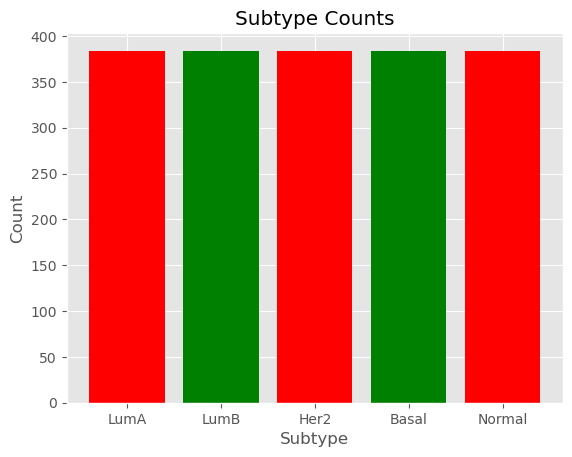

In [91]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [384, 384, 384, 384, 384]

# labels for bars
tick_label = ['LumA', 'LumB', 'Her2', 'Basal', 'Normal']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
		width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Subtype')
# naming the y-axis
plt.ylabel('Count')
# plot title
plt.title('Subtype Counts')

# function to show the plot
plt.show()

In [67]:
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

In [68]:
# Set the hyperparameters for data creation
NUM_CLASSES = 5
NUM_FEATURES = 1550
RANDOM_SEED = 1234

tensor([[-24.5315,  11.3428, -31.2849,  ...,  -0.2807,   0.3409,   0.2917],
        [-18.5242,  34.1467, -18.2999,  ...,   0.3612,  -0.1686,  -0.2620],
        [-19.8812,   4.9192, -11.0817,  ...,   0.2844,  -0.9928,  -0.3798],
        [ 20.8339, -31.3440,  16.5955,  ...,   0.8189,  -0.9550,   0.2683],
        [-28.6017,  29.4119, -16.3454,  ...,  -0.3050,  -0.7800,  -0.1081]]) tensor([1, 3, 0, 0, 4])


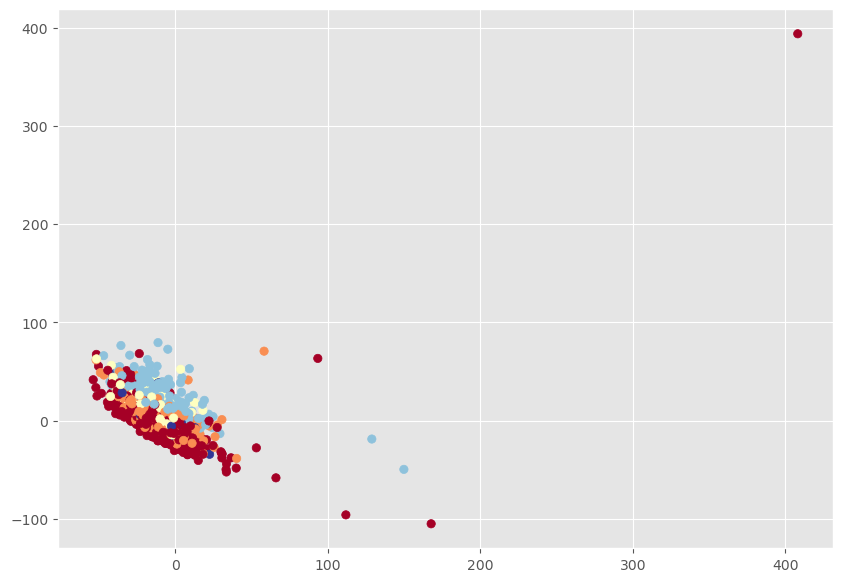

In [69]:
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);
print(X[:5], y[:5])

In [70]:
X_train.shape

torch.Size([1920, 1550])

In [71]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [72]:
from torch import nn
# Build model
class classificationModel(nn.Module):
    def __init__(self, input_features, output_features):
        
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=1550, out_features=1024),
            nn.Linear(in_features=1024, out_features=512),
            # nn.ReLU(), 
            nn.Linear(in_features=512,out_features=256),
            nn.Linear(in_features=256,out_features=128),
            # nn.ReLU(), 
            nn.Linear(in_features=128,out_features=64), 
            nn.Linear(in_features=64,out_features=5),
            # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)
model_1 = classificationModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES).to(device)
model_1

classificationModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1550, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Linear(in_features=64, out_features=5, bias=True)
  )
)

In [73]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), 
                            lr=0.01) # exercise: try changing the learning rate here and seeing what happens to the model's performanc

In [74]:
model_1(X_train.to(device))[:5]

tensor([[-0.2191, -0.2535, -0.1583, -0.0141,  0.0512],
        [ 0.0086, -0.1268, -0.0982,  0.1330, -0.0548],
        [ 0.1427, -0.1200, -0.0717, -0.0044, -0.1728],
        [-0.0512, -0.1593, -0.1291,  0.1582, -0.2428],
        [-0.1458, -0.3374,  0.3161, -0.0468, -0.2851]],
       grad_fn=<SliceBackward0>)

In [75]:
# How many elements in a single prediction sample?
model_1(X_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([5]), 5)

In [76]:
# Make prediction logits with model
y_logits = model_1(X_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.1684,  0.2699, -0.0176,  0.3173,  0.0864],
        [ 0.1650, -0.4490, -0.2055, -0.0397, -0.2575],
        [-0.0330, -0.4432,  0.1141,  0.1199,  0.2284],
        [ 0.0457, -0.0565, -0.2295,  0.4214, -0.0988],
        [-0.1204, -0.0727, -0.2617,  0.2569, -0.1303]],
       grad_fn=<SliceBackward0>)
tensor([[0.1509, 0.2339, 0.1754, 0.2452, 0.1947],
        [0.2701, 0.1462, 0.1865, 0.2201, 0.1770],
        [0.1892, 0.1255, 0.2192, 0.2204, 0.2457],
        [0.2007, 0.1812, 0.1524, 0.2922, 0.1737],
        [0.1864, 0.1955, 0.1618, 0.2718, 0.1845]], grad_fn=<SliceBackward0>)


In [77]:
# Sum the first sample output of the softmax activation function 
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [78]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1509, 0.2339, 0.1754, 0.2452, 0.1947], grad_fn=<SelectBackward0>)
tensor(3)


In [79]:
y_train.dtype

torch.int64

In [80]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [81]:
torch.manual_seed(1234)

# Set number of epochs
epochs = 300
epoch_count=[]
acc_value=[]
test_acc_value=[]
test_loss_values=[]

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 1 == 0:
        epoch_count.append(epoch)
        acc_value.append(acc)
        test_acc_value.append(test_acc)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.64176, Acc: 12.50% | Test Loss: 1.57534, Test Acc: 28.42%
Epoch: 1 | Loss: 1.58601, Acc: 21.67% | Test Loss: 1.53894, Test Acc: 35.26%
Epoch: 2 | Loss: 1.53383, Acc: 33.39% | Test Loss: 1.50446, Test Acc: 44.21%
Epoch: 3 | Loss: 1.48427, Acc: 44.01% | Test Loss: 1.47140, Test Acc: 49.47%
Epoch: 4 | Loss: 1.43668, Acc: 51.35% | Test Loss: 1.43941, Test Acc: 51.05%
Epoch: 5 | Loss: 1.39060, Acc: 57.86% | Test Loss: 1.40827, Test Acc: 52.11%
Epoch: 6 | Loss: 1.34571, Acc: 61.56% | Test Loss: 1.37786, Test Acc: 53.68%
Epoch: 7 | Loss: 1.30185, Acc: 65.05% | Test Loss: 1.34813, Test Acc: 56.84%
Epoch: 8 | Loss: 1.25890, Acc: 67.40% | Test Loss: 1.31907, Test Acc: 57.89%
Epoch: 9 | Loss: 1.21686, Acc: 69.27% | Test Loss: 1.29073, Test Acc: 57.89%
Epoch: 10 | Loss: 1.17574, Acc: 70.89% | Test Loss: 1.26316, Test Acc: 58.42%
Epoch: 11 | Loss: 1.13559, Acc: 72.86% | Test Loss: 1.23642, Test Acc: 58.42%
Epoch: 12 | Loss: 1.09647, Acc: 75.10% | Test Loss: 1.21059, Test Acc: 58.

Epoch: 106 | Loss: 0.10964, Acc: 97.92% | Test Loss: 0.34300, Test Acc: 87.89%
Epoch: 107 | Loss: 0.10791, Acc: 97.92% | Test Loss: 0.34182, Test Acc: 87.89%
Epoch: 108 | Loss: 0.10621, Acc: 98.07% | Test Loss: 0.34068, Test Acc: 87.89%
Epoch: 109 | Loss: 0.10454, Acc: 98.12% | Test Loss: 0.33958, Test Acc: 87.89%
Epoch: 110 | Loss: 0.10291, Acc: 98.18% | Test Loss: 0.33851, Test Acc: 87.89%
Epoch: 111 | Loss: 0.10131, Acc: 98.28% | Test Loss: 0.33749, Test Acc: 87.89%
Epoch: 112 | Loss: 0.09973, Acc: 98.33% | Test Loss: 0.33650, Test Acc: 87.89%
Epoch: 113 | Loss: 0.09819, Acc: 98.33% | Test Loss: 0.33555, Test Acc: 87.89%
Epoch: 114 | Loss: 0.09668, Acc: 98.33% | Test Loss: 0.33463, Test Acc: 88.42%
Epoch: 115 | Loss: 0.09519, Acc: 98.33% | Test Loss: 0.33375, Test Acc: 88.42%
Epoch: 116 | Loss: 0.09374, Acc: 98.33% | Test Loss: 0.33290, Test Acc: 88.42%
Epoch: 117 | Loss: 0.09231, Acc: 98.39% | Test Loss: 0.33207, Test Acc: 88.95%
Epoch: 118 | Loss: 0.09091, Acc: 98.44% | Test Loss:

Epoch: 210 | Loss: 0.02758, Acc: 99.84% | Test Loss: 0.31937, Test Acc: 87.89%
Epoch: 211 | Loss: 0.02729, Acc: 99.84% | Test Loss: 0.31954, Test Acc: 87.89%
Epoch: 212 | Loss: 0.02701, Acc: 99.84% | Test Loss: 0.31972, Test Acc: 87.89%
Epoch: 213 | Loss: 0.02673, Acc: 99.84% | Test Loss: 0.31990, Test Acc: 87.89%
Epoch: 214 | Loss: 0.02645, Acc: 99.84% | Test Loss: 0.32008, Test Acc: 87.89%
Epoch: 215 | Loss: 0.02618, Acc: 99.84% | Test Loss: 0.32026, Test Acc: 87.89%
Epoch: 216 | Loss: 0.02591, Acc: 99.84% | Test Loss: 0.32045, Test Acc: 87.89%
Epoch: 217 | Loss: 0.02565, Acc: 99.84% | Test Loss: 0.32064, Test Acc: 87.89%
Epoch: 218 | Loss: 0.02539, Acc: 99.84% | Test Loss: 0.32082, Test Acc: 87.89%
Epoch: 219 | Loss: 0.02513, Acc: 99.84% | Test Loss: 0.32102, Test Acc: 87.89%
Epoch: 220 | Loss: 0.02488, Acc: 99.84% | Test Loss: 0.32121, Test Acc: 87.89%
Epoch: 221 | Loss: 0.02463, Acc: 99.84% | Test Loss: 0.32141, Test Acc: 87.89%
Epoch: 222 | Loss: 0.02438, Acc: 99.84% | Test Loss:

In [82]:
# Make predictions
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -7.2293,   6.1265,   5.6573,   0.3832,  -4.4186],
        [  0.2235,  -0.5529,   5.8272,  -5.0882,  -3.7400],
        [-13.4621,  -2.4342,   1.9661,   9.0648,   7.2694],
        [  6.1746,   4.0620,  -1.9928,  -3.2334,  -5.2159],
        [  0.6603,   3.3949,   1.7538,  -2.6192,  -4.1071],
        [-12.3201,  -4.4286,   2.9597,   8.1067,   7.1160],
        [  0.6909,   2.2847,   1.0307,  -1.8578,  -2.8488],
        [-27.5630,   4.7192,   4.6033,  18.4053,   3.5774],
        [-18.9054,   0.4486,   5.7459,  10.5807,   4.3176],
        [-14.7517,  -0.4883,   0.9377,  11.2552,   5.6744]])

In [83]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds)}%")

Predictions: tensor([1, 2, 3, 0, 1, 3, 1, 3, 3, 3])
Labels: tensor([2, 1, 3, 0, 1, 3, 0, 3, 3, 3])
Test accuracy: 87.89473684210526%


In [84]:
import seaborn as sns

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

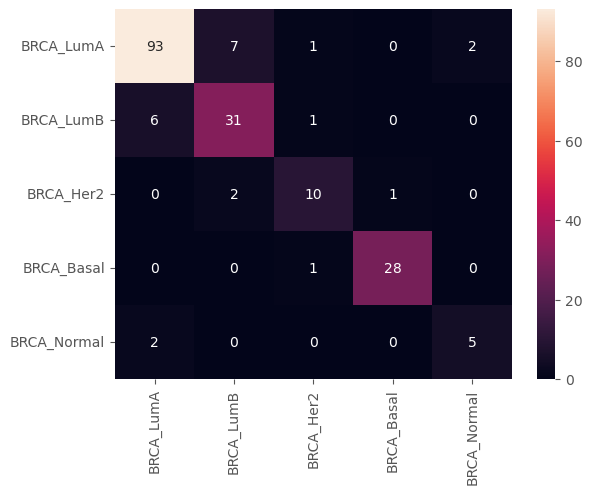

In [86]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_preds)).rename(columns=Labels, index=Labels)

sns.heatmap(confusion_matrix_df, annot=True)

In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       103
           1       0.78      0.82      0.79        38
           2       0.77      0.77      0.77        13
           3       0.97      0.97      0.97        29
           4       0.71      0.71      0.71         7

    accuracy                           0.88       190
   macro avg       0.83      0.83      0.83       190
weighted avg       0.88      0.88      0.88       190



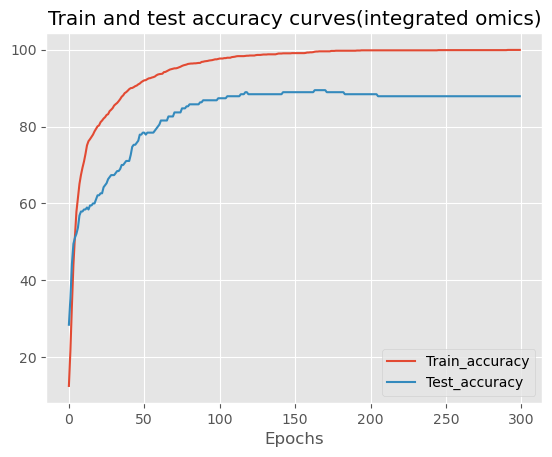

In [88]:
plt.plot(epoch_count,np.array(torch.tensor(acc_value).numpy()),label="Train_accuracy")
plt.plot(epoch_count,np.array(torch.tensor(test_acc_value).numpy()),label="Test_accuracy")
plt.title("Train and test accuracy curves(integrated omics)")
plt.xlabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [89]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("C:/Users/jawad/OneDrive/Desktop/Surayya")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "Final_multiomics.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: C:\Users\jawad\OneDrive\Desktop\Surayya\Final_multiomics.pt


In [90]:
# Instantiate a fresh instance of classificationModel
loaded_model_1 = classificationModel('input_features','output_features')

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")


Loaded model:
classificationModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1550, out_features=1024, bias=True)
    (1): Linear(in_features=1024, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Linear(in_features=64, out_features=5, bias=True)
  )
)
Model on device:
cpu
